<a href="https://colab.research.google.com/github/iamatul1214/ComputerVision/blob/main/Image_understanding_computer_vision_2_(conv_and_pooling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
ROOT="/content/drive/MyDrive/Colab_practices"
os.chdir(ROOT)

In [5]:
car_image="car1.jpeg"

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [20]:
## creating a function to read an image either in grascale or in colored
def read_image(path, grayscale=True):
  image=cv2.imread(car_image)
  if grayscale:
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    plt.imshow(image,cmap='gray')
    return image
  else:
    cv2_imshow(image)
    return image

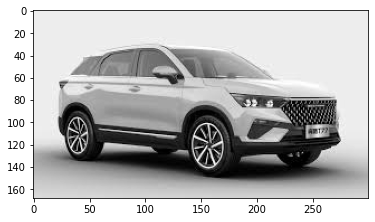

In [18]:
car=read_image(car_image)

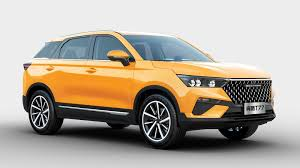

In [21]:
## reading a colored image
car_colored=read_image(path=car_image,grayscale=False)

In [22]:
## let's check the shape of both the colored and grayedscale cars
print(car.shape)
print(car_colored.shape)

(168, 300)
(168, 300, 3)


In [46]:
## Let's define the input images size
rows,columns=car.shape
print(f"rows and columns= {rows,columns}")
car=car.reshape(1,rows,columns,1)
car.shape     ## 1st 1 shows the number of images (we will put 32 if there are 32 images in the batch, other two are the size of image, last one is 1 because is grayscaled image or else it would be 3 or 4)

rows and columns= (168, 300)


(1, 168, 300, 1)

In [47]:
## Let's create a convolutional layer now for gray scale images
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


#### We have total 10 trainable parameters. How ??
#### We have 1 filter with 3*3 size which means 9 parameters + 1 biased parameters

In [48]:
## Now, we haven't trained any model yet but still let's try to predict how the image will look like if it passed throught our created CNN network
output=conv_model.predict(car)
output.shape

(1, 166, 298, 1)

### The output has shape of 1, 166, 298 ,1 which means only 1 image in batch with shape of 166,298 and that two with only 1 channel which indicates it is an gray scale image.

TypeError: ignored

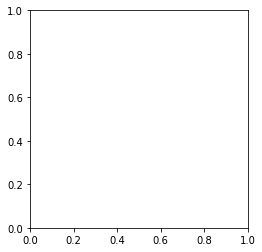

In [50]:
## Let's try to show the output image
plt.imshow(output, cmap='gray')

### The reason why we couldn't show the output image is because it has a shape of 1,166,298,1 which means 4 length and the image should only take either 2 or 3 parameters to show up.
### So let's reshape the output image below.

In [56]:
shape=output.shape[1:-1]
out=output.reshape(shape)
out.shape


(166, 298)

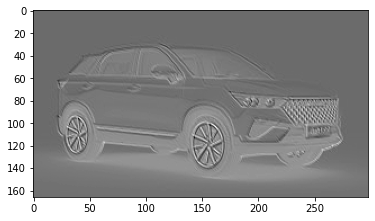

In [57]:
plt.imshow(out, cmap='gray')